In [6]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.
^C
Note: you may need to restart the kernel to use updated packages.


   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   --- ------------------------------------ 1.3/14.8 MB 11.2 MB/s eta 0:00:02
   ---------------------- ----------------- 8.4/14.8 MB 26.0 MB/s eta 0:00:01
   ---------------------------------------  14.7/14.8 MB 28.8 MB/s eta 0:00:01
   ---------------------------------------- 14.8/14.8 MB 27.4 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ----------------------

Loading data from FRANCOPC_20250504-000007\Procesos_043325013346.csv...
Successfully extracted timestamps from the data.
Added 'ElapsedTime' column in seconds.

Dataset contains 92 samples
Time range: 2025-05-04 01:33:46.295000 to 2025-05-04 01:41:21.297000
Total duration: 0 days 00:07:35.002000

Found 77 metrics related to Python processes
Found Process ID columns with 'ID Process': ['\\\\FRANCOPC\\Process(python#6)\\ID Process', '\\\\FRANCOPC\\Process(python#5)\\ID Process', '\\\\FRANCOPC\\Process(python#4)\\ID Process', '\\\\FRANCOPC\\Process(python#3)\\ID Process', '\\\\FRANCOPC\\Process(python#2)\\ID Process', '\\\\FRANCOPC\\Process(python#1)\\ID Process', '\\\\FRANCOPC\\Process(python)\\ID Process']
Found Process ID columns with 'ID': ['\\\\FRANCOPC\\Process(python#6)\\ID Process', '\\\\FRANCOPC\\Process(python#5)\\ID Process', '\\\\FRANCOPC\\Process(python#4)\\ID Process', '\\\\FRANCOPC\\Process(python#3)\\ID Process', '\\\\FRANCOPC\\Process(python#2)\\ID Process', '\\\\FRANCOPC

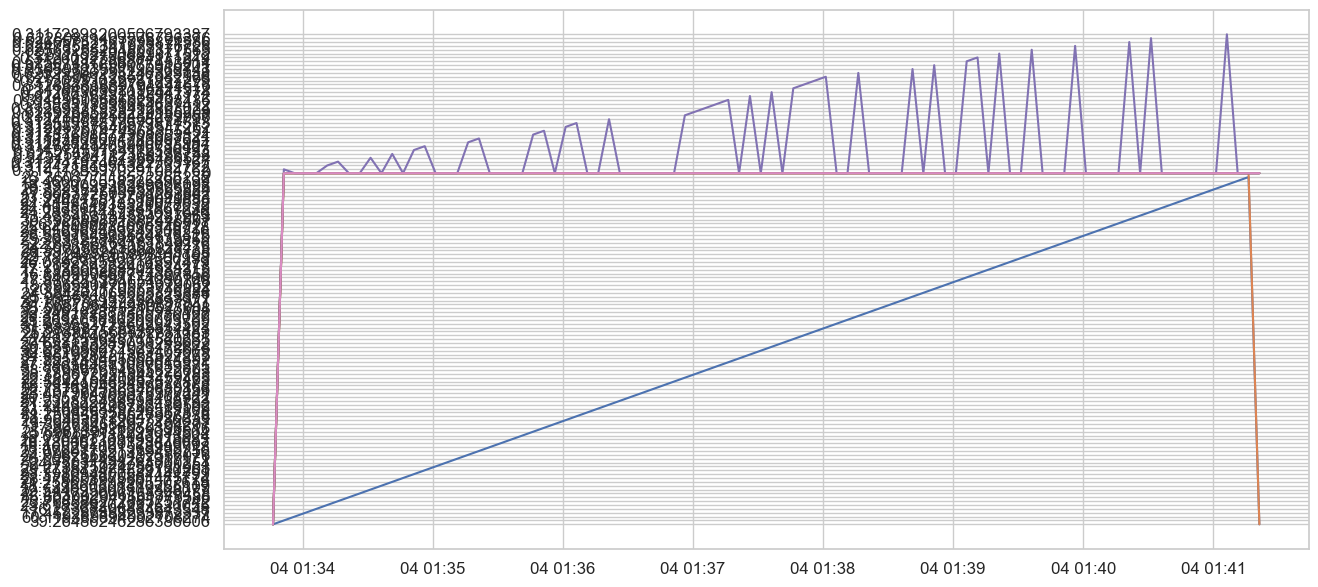

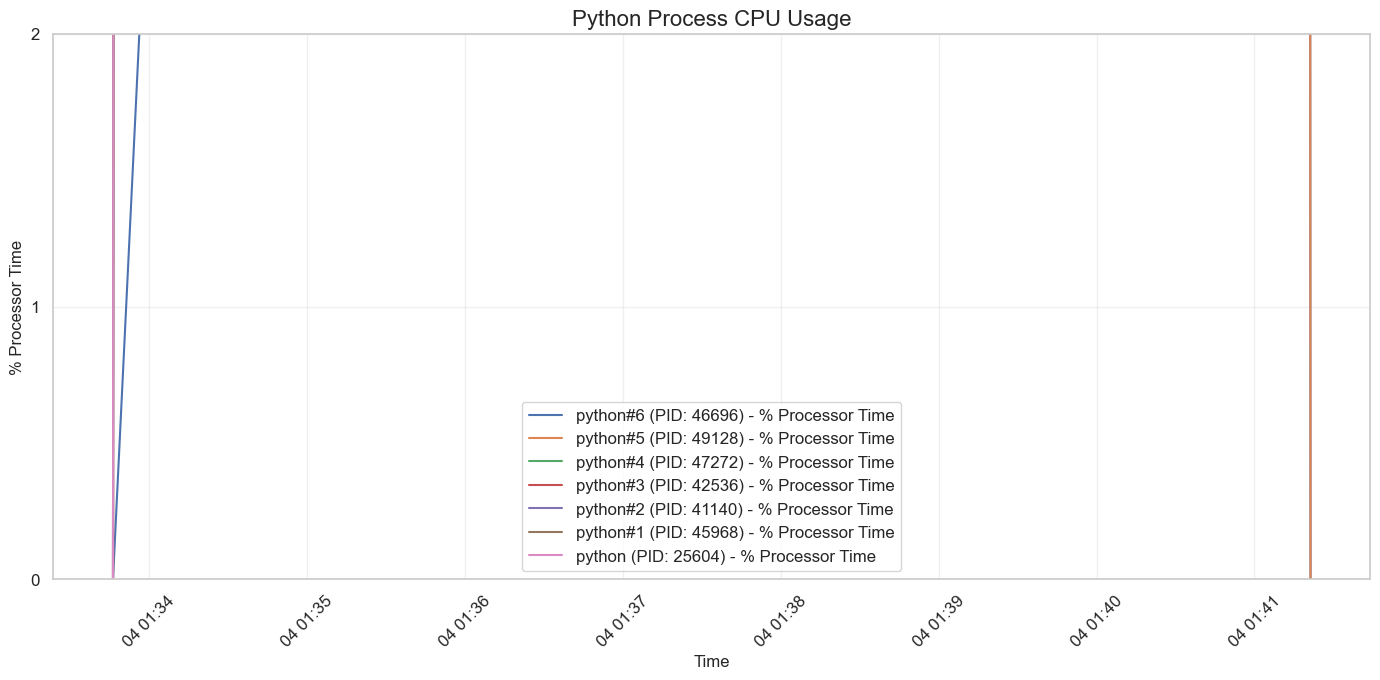


CPU Usage Statistics:

Process CPU Usage Statistics:
count     92
unique    91
top         
freq       2
Name: \\FRANCOPC\Process(python#6)\% Processor Time, dtype: object

python#6 (PID: 46696) - % Processor Time:
count     92
unique     2
top        0
freq      90
Name: \\FRANCOPC\Process(python#5)\% Processor Time, dtype: object

python#5 (PID: 49128) - % Processor Time:
count     92
unique     2
top        0
freq      91
Name: \\FRANCOPC\Process(python#4)\% Processor Time, dtype: object

python#4 (PID: 47272) - % Processor Time:
count     92
unique     2
top        0
freq      91
Name: \\FRANCOPC\Process(python#3)\% Processor Time, dtype: object

python#3 (PID: 42536) - % Processor Time:
count     92
unique    38
top        0
freq      55
Name: \\FRANCOPC\Process(python#2)\% Processor Time, dtype: object

python#2 (PID: 41140) - % Processor Time:
count     92
unique     2
top        0
freq      91
Name: \\FRANCOPC\Process(python#1)\% Processor Time, dtype: object

python#1 (PID: 4

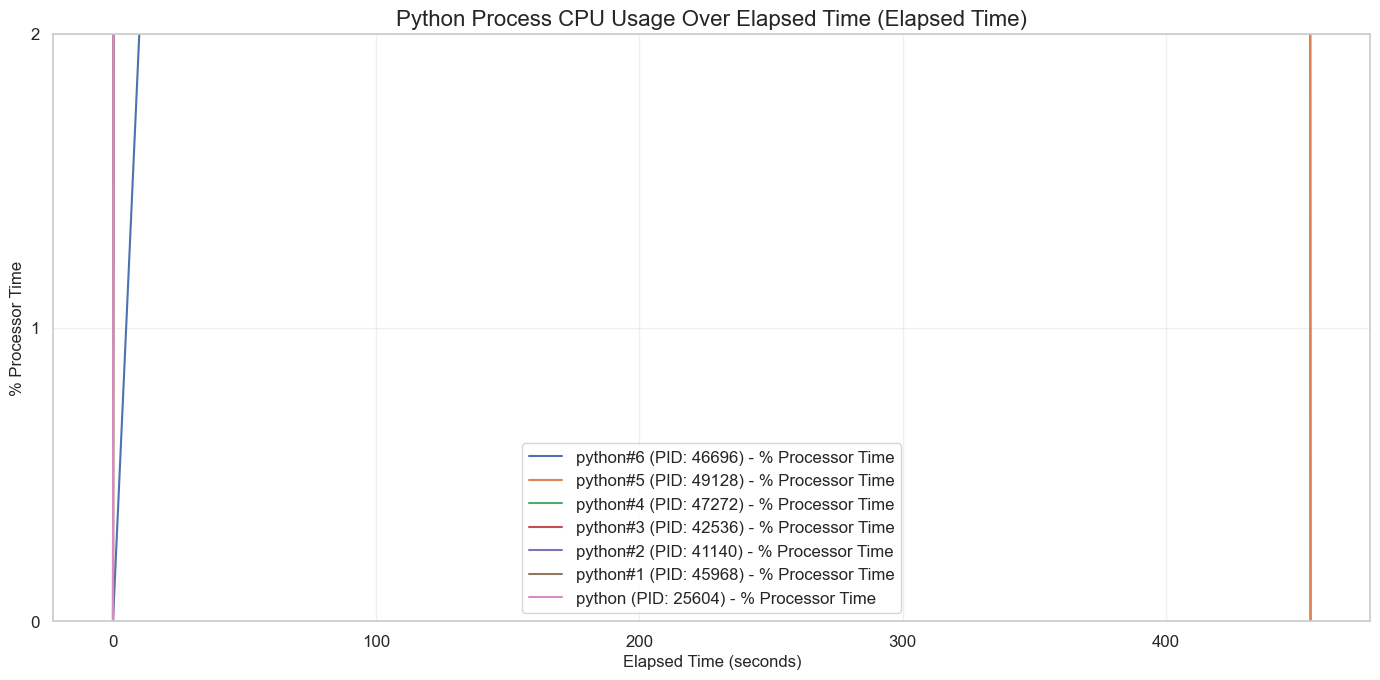


----- Python Memory Usage Analysis -----


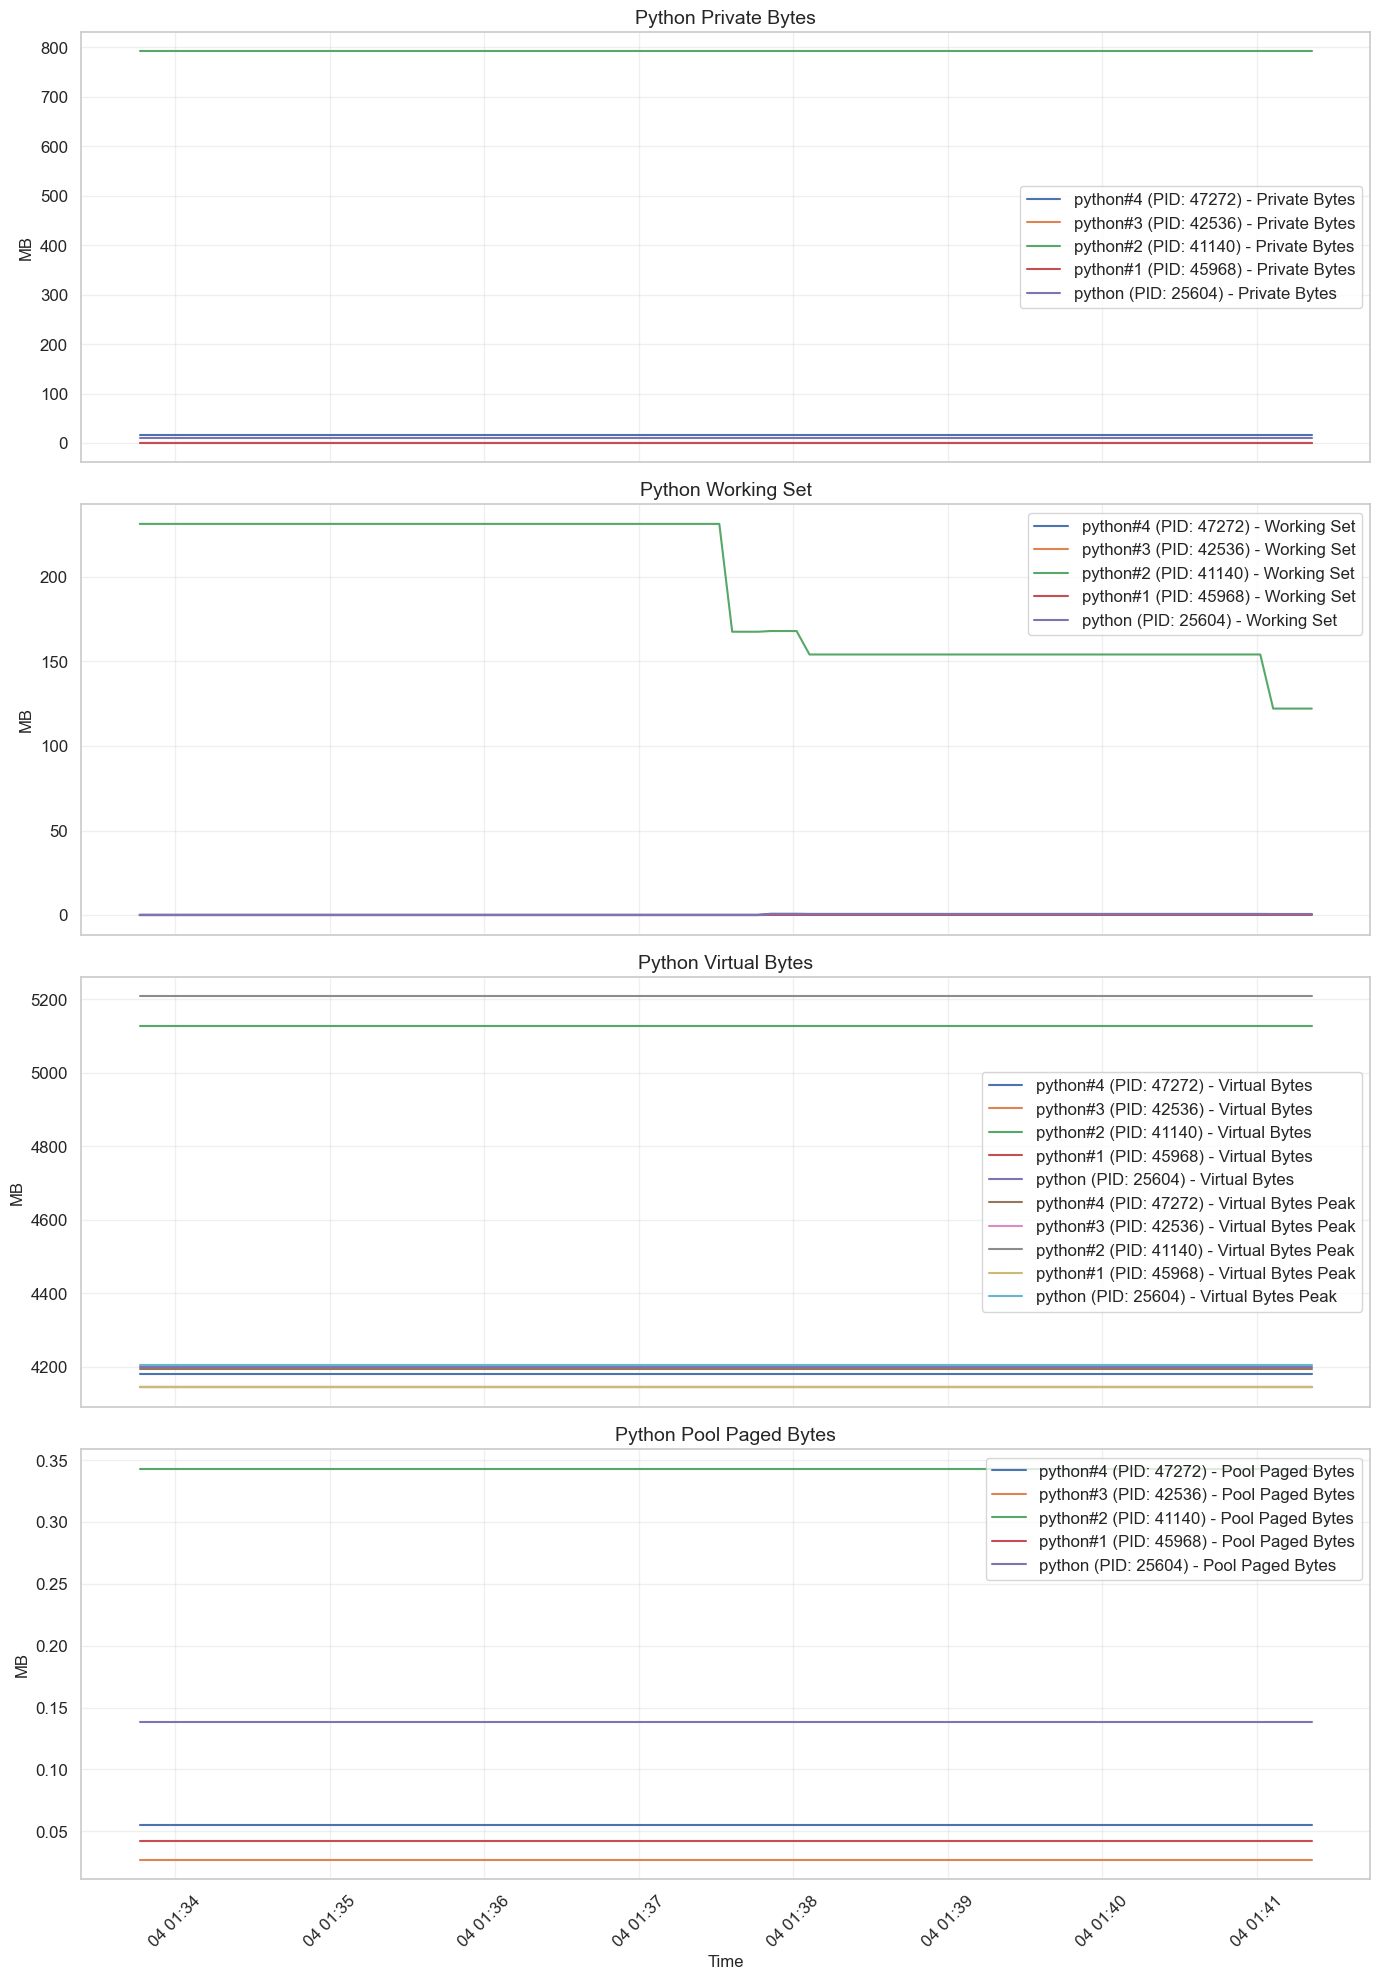

TypeError: unsupported operand type(s) for /: 'str' and 'int'

<Figure size 1400x700 with 0 Axes>

In [ ]:
# Python Process Performance Analyzer with PID in Graphics
# Enhanced version that includes Process IDs in visualizations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
import os
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

# Set the style for our plots
plt.style.use('ggplot')
sns.set(font_scale=1.1)
sns.set_style("whitegrid")

# File path - adjust this to your actual file location
# file_path = 'FRANCOPC_20250504-000006\Procesos_040825010827.csv' # PID: 49140 (SPADE - Small)

# MEDIUM PID: 46696
file_path = "FRANCOPC_20250504-000007\Procesos_043325013346.csv"

# FULL PID: 6284

# JADE - Medium PID: 40428
# JADE - Small PID: 40492
# JADE - Full PID: 15476

# Read the perfmon CSV file
def load_perfmon_data(filepath):
    """Load and preprocess the perfmon CSV data"""
    print(f"Loading data from {filepath}...")
    
    # Read the CSV file
    df = pd.read_csv(filepath)
    
    # Rename the first column to 'Timestamp'
    df = df.rename(columns={df.columns[0]: 'Timestamp'})
    
    # Try to extract actual timestamps from the first column
    # Perfmon timestamps are often in this format, but can vary
    try:
        # Look for patterns like MM/DD/YYYY HH:MM:SS.mmm in the data
        # The pattern below is flexible to match various date formats
        date_pattern = r'(\d{1,4}[-/]\d{1,2}[-/]\d{1,4}\s\d{1,2}:\d{2}:\d{2}(?:\.\d+)?)'
        
        # Extract timestamps if they match the pattern
        timestamps = []
        for time_str in df['Timestamp']:
            match = re.search(date_pattern, str(time_str))
            if match:
                try:
                    # Try to parse the extracted timestamp
                    timestamp = pd.to_datetime(match.group(1))
                    timestamps.append(timestamp)
                except:
                    timestamps.append(pd.NaT)
            else:
                timestamps.append(pd.NaT)
                
        # If we have valid timestamps, use them
        if not all(pd.isna(timestamps)):
            df['DateTimeIndex'] = timestamps
            df = df[~pd.isna(df['DateTimeIndex'])]  # Remove rows with invalid timestamps
            print(f"Successfully extracted timestamps from the data.")
        else:
            print("Could not extract timestamps from the first column. Using sample numbers instead.")
            df['DateTimeIndex'] = pd.date_range(start=datetime.now(), periods=len(df), freq='S')
    except Exception as e:
        print(f"Error processing timestamps: {e}")
        print("Using sample numbers with artificial timestamps instead.")
        df['DateTimeIndex'] = pd.date_range(start=datetime.now(), periods=len(df), freq='S')
    
    # Calculate elapsed time in seconds from the first timestamp
    if 'DateTimeIndex' in df.columns:
        start_time = df['DateTimeIndex'].min()
        df['ElapsedTime'] = (df['DateTimeIndex'] - start_time).dt.total_seconds()
        print("Added 'ElapsedTime' column in seconds.")
    
    return df

# Function to find columns related to a specific process
def find_process_columns(df, process_name, metric=None):
    """Find columns related to a specific process and optionally a specific metric"""
    process_cols = []
    
    for col in df.columns:
        if process_name.lower() in col.lower():
            if metric is None or metric in col:
                process_cols.append(col)
    
    return process_cols

# Function to extract Process ID information
def extract_process_ids(df, process_name):
    """
    Extract process IDs for a specific process from the data.
    Tries multiple approaches to find PID information.
    """
    # Dictionary to store process names and their PIDs
    process_ids = {}
    
    # Method 1: Check if there are explicit PID columns in the data
    pid_variations = ['ID Process', 'Process ID', 'PID', 'ID', 'Process(ID)']
    
    for pid_var in pid_variations:
        pid_cols = find_process_columns(df, process_name, pid_var)
        if pid_cols:
            print(f"Found Process ID columns with '{pid_var}': {pid_cols}")
            for col in pid_cols:
                # Extract process name from the column
                name_match = re.search(r'Process\((.*?)\)', col)
                if name_match:
                    process_name = name_match.group(1)
                    # Get the most common value as the process ID
                    pid_values = df[col].dropna()
                    if not pid_values.empty:
                        pid = pid_values.value_counts().index[0]
                        process_ids[process_name] = pid
    
    # Method 2: If no explicit PID columns, try to extract PIDs from instance names
    # (some perfmon logs include PIDs in instance names like "python#1234")
    if not process_ids:
        print("No explicit PID columns found. Attempting to extract PIDs from instance names...")
        
        # Find all process columns for this process type
        all_cols = find_process_columns(df, process_name)
        
        # Extract process names with potential PIDs embedded
        for col in all_cols:
            # Look for patterns like process_name#1234 or process_name (1234)
            pid_pattern1 = rf'{process_name}#(\d+)'
            pid_pattern2 = rf'{process_name}\((\d+)\)'
            pid_pattern3 = rf'{process_name}_(\d+)'
            
            for pattern in [pid_pattern1, pid_pattern2, pid_pattern3]:
                match = re.search(pattern, col, re.IGNORECASE)
                if match:
                    pid = match.group(1)
                    proc_match = re.search(r'Process\((.*?)(?:#|\(|_).*?\)', col)
                    if proc_match:
                        proc_name = proc_match.group(1)
                    else:
                        proc_match = re.search(r'Process\((.*?)\)', col)
                        if proc_match:
                            proc_name = proc_match.group(1)
                        else:
                            proc_name = process_name
                    
                    process_ids[proc_name] = pid
                    break
    
    # Method 3: For processes with instance numbers but no PIDs,
    # generate artificial PIDs to differentiate them
    if not process_ids:
        print("Could not find real PIDs. Using instance numbers as identifiers...")
        
        # Get all unique process instances
        process_instances = set()
        for col in find_process_columns(df, process_name):
            instance_match = re.search(rf'Process\(({process_name}(?:#\d+)?)\)', col)
            if instance_match:
                process_instances.add(instance_match.group(1))
        
        # Assign sequential numbers as PIDs
        for i, instance in enumerate(sorted(process_instances)):
            process_ids[instance] = f"instance_{i+1}"
    
    return process_ids

# Function to clean column names for display
def clean_column_name(col_name, process_ids=None):
    """
    Extract the process name and metric from a column name for cleaner display.
    If process_ids dictionary is provided, include PID information in the label.
    """
    try:
        # Pattern to match process(name)\metric or similar formats
        match = re.search(r'Process\((.*?)\)\\(.*)', col_name)
        if match:
            process_name = match.group(1)
            metric = match.group(2)
            
            # Add PID information if available
            if process_ids and process_name in process_ids:
                return f"{process_name} (PID: {process_ids[process_name]}) - {metric}"
            else:
                return f"{process_name} - {metric}"
        else:
            return col_name.split('\\')[-1]
    except:
        return col_name
    
def plot_cpu_usage_with_fixed_axis(df, cpu_cols, process_ids=None, use_elapsed_time=True, title_suffix=""):
    """
    Create a CPU usage plot with proper Y-axis formatting.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The perfmon data
    cpu_cols : list
        List of CPU usage column names
    process_ids : dict, optional
        Dictionary mapping process names to PIDs
    use_elapsed_time : bool, default=True
        Whether to use elapsed time (True) or datetime (False) for X-axis
    title_suffix : str, optional
        Additional text to append to the plot title
    """
    plt.figure(figsize=(14, 7))
    
    x_data = df['ElapsedTime'] if use_elapsed_time else df['DateTimeIndex']
    
    for col in cpu_cols:
        # Use the clean_column_name function that includes PIDs
        clean_name = clean_column_name(col, process_ids)
        plt.plot(x_data, df[col], label=clean_name)
    
    # Set the proper title based on whether elapsed time is used
    if use_elapsed_time:
        title = f'Python Process CPU Usage Over Elapsed Time{title_suffix}'
        xlabel = 'Elapsed Time (seconds)'
    else:
        title = f'Python Process CPU Usage{title_suffix}'
        xlabel = 'Time'
    
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('% Processor Time', fontsize=12)
    
    # Fix the Y-axis to start at 0 and use a reasonable scale
    y_max = max(df[cpu_cols].max())  # Add 10% margin
    plt.ylim(0, y_max)
    
    # Format Y-axis to use integers when possible, and at most 1 decimal place
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(
        lambda y, pos: f"{y:.1f}" if y % 1 != 0 else f"{int(y)}"
    ))
    
    # Add a grid with light lines for better readability
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Rotate X-axis labels if using datetime
    if not use_elapsed_time:
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    
    # Generate filename based on parameters
    time_type = "elapsed" if use_elapsed_time else "datetime"
    suffix = title_suffix.replace(" ", "_").lower() if title_suffix else ""
    filename = f'python_cpu_usage_{time_type}_with_pid{suffix}.png'
    
    plt.savefig(filename, dpi=300)
    plt.show()

# Load the data
df = load_perfmon_data(file_path)

# Print basic information about the dataset
print(f"\nDataset contains {len(df)} samples")
print(f"Time range: {df['DateTimeIndex'].min()} to {df['DateTimeIndex'].max()}")
print(f"Total duration: {df['DateTimeIndex'].max() - df['DateTimeIndex'].min()}")

# Find all python process columns
python_cols = find_process_columns(df, 'python')
print(f"\nFound {len(python_cols)} metrics related to Python processes")

# Extract process IDs for Python processes
python_process_ids = extract_process_ids(df, 'python')
if python_process_ids:
    print("\nPython Process IDs:")
    for process, pid in python_process_ids.items():
        print(f"- {process}: {pid}")

# Find other processes for comparison
other_processes = ['System', 'Idle', 'svchost', 'chrome', 'firefox']
process_counts = {}

for process in other_processes:
    cols = find_process_columns(df, process, '% Processor Time')
    process_counts[process] = len(cols)
    
print("\nProcess counts for comparison:")
for process, count in process_counts.items():
    print(f"- {process}: {count} instances")

# 1. CPU Usage Analysis
print("\n----- Python CPU Usage Analysis -----")

# Find all python process CPU usage columns
python_cpu_cols = find_process_columns(df, 'python', '% Processor Time')

if python_cpu_cols:
    plt.figure(figsize=(14, 7))
    
    for col in python_cpu_cols:
        # Use the enhanced clean_column_name that includes PIDs
        clean_name = clean_column_name(col, python_process_ids)
        plt.plot(df['DateTimeIndex'], df[col], label=clean_name)
    

    plot_cpu_usage_with_fixed_axis(df, python_cpu_cols, python_process_ids, use_elapsed_time=False)
    # Calculate and display CPU usage statistics
    print("\nCPU Usage Statistics:")
    
    # Get descriptive statistics but handle them correctly
    stats_df = df[python_cpu_cols].describe().T
    
    # Print a cleaned version of the statistics that includes PIDs
    print("\nProcess CPU Usage Statistics:")
    for idx, row in stats_df.iterrows():
        process_name = clean_column_name(idx, python_process_ids)
        print(row)
        print(f"\n{process_name}:")
        #print(f"  Top: {row['top']:.2f}%")
        #print(f"  Freq: {row['freq']:.2f}%")
        #print(f"  Unique: {row['unique']:.2f}%")
        # print(f"  Std Dev: {row['std']:.2f}%")
    
    # Also show time-based analysis using the ElapsedTime column
    if 'ElapsedTime' in df.columns:
        plot_cpu_usage_with_fixed_axis(df, python_cpu_cols, python_process_ids, use_elapsed_time=True, title_suffix=" (Elapsed Time)")
        # Calculate and display CPU usage statistics over elapsed time
else:
    print("No Python CPU usage data found in the dataset.")

# 2. Memory Usage Analysis
print("\n----- Python Memory Usage Analysis -----")

# Find memory-related columns for Python processes
memory_metrics = ['Private Bytes', 'Working Set', 'Virtual Bytes', 'Pool Paged Bytes']
memory_analysis = {}

for metric in memory_metrics:
    cols = find_process_columns(df, 'python', metric)
    memory_analysis[metric] = cols

# Create a multi-panel memory usage plot
memory_plot_count = sum(1 for metric, cols in memory_analysis.items() if cols)

if memory_plot_count > 0:
    fig, axes = plt.subplots(memory_plot_count, 1, figsize=(14, 5*memory_plot_count), sharex=True)
    
    # Handle case where there's only one subplot
    if memory_plot_count == 1:
        axes = [axes]
    
    plot_idx = 0
    for metric, cols in memory_analysis.items():
        if cols:
            ax = axes[plot_idx]
            
            for col in cols:
                clean_name = clean_column_name(col, python_process_ids)
                # Convert bytes to MB for better readability
                if df[col].dtype == 'object':
                    continue  # Skip if the column is not numeric
                
                df[col] = df[col].astype(float)  # Ensure the column is float for division  
                ax.plot(df['DateTimeIndex'], df[col]/1024/1024, label=clean_name)
            
            ax.set_title(f'Python {metric}', fontsize=14)
            ax.set_ylabel('MB', fontsize=12)
            ax.grid(True, alpha=0.3)
            ax.legend()
            
            plot_idx += 1
    
    plt.xlabel('Time', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('python_memory_usage_with_pid.png', dpi=300)
    plt.show()
    
    # Also plot memory vs elapsed time if available
    if 'ElapsedTime' in df.columns:
        for metric, cols in memory_analysis.items():
            if cols:
                plt.figure(figsize=(14, 7))
                
                for col in cols:
                    clean_name = clean_column_name(col, python_process_ids)
                    plt.plot(df['ElapsedTime'], df[col]/1024/1024, label=clean_name)
                
                plt.title(f'Python {metric} Over Elapsed Time', fontsize=16)
                plt.xlabel('Elapsed Time (seconds)', fontsize=12)
                plt.ylabel('MB', fontsize=12)
                plt.grid(True, alpha=0.3)
                plt.legend()
                plt.tight_layout()
                plt.savefig(f'python_{metric.lower().replace(" ", "_")}_elapsed_with_pid.png', dpi=300)
                plt.show()
    
    # Calculate memory growth rate
    print("\nMemory Growth Analysis:")
    for metric, cols in memory_analysis.items():
        for col in cols:
            if len(df) > 1:
                # Calculate average growth rate in MB per minute
                first_val = df[col].iloc[0] / (1024*1024)  # First value in MB
                last_val = df[col].iloc[-1] / (1024*1024)  # Last value in MB
                
                # Calculate time difference in minutes
                time_diff_seconds = (df['DateTimeIndex'].iloc[-1] - df['DateTimeIndex'].iloc[0]).total_seconds()
                time_diff_minutes = time_diff_seconds / 60
                
                if time_diff_minutes > 0:
                    growth_rate = (last_val - first_val) / time_diff_minutes
                    
                    print(f"\n{clean_column_name(col, python_process_ids)}:")
                    print(f"  Initial: {first_val:.2f} MB")
                    print(f"  Final: {last_val:.2f} MB")
                    print(f"  Change: {last_val - first_val:.2f} MB")
                    print(f"  Growth rate: {growth_rate:.4f} MB/minute")
                    
                    if growth_rate > 0.1:
                        print("  Warning: Significant memory growth detected. Potential memory leak.")
                    elif growth_rate > 0:
                        print("  Info: Memory usage is increasing but at a reasonable rate.")
                    else:
                        print("  Info: Memory usage is stable or decreasing.")
else:
    print("No Python memory data found in the dataset.")

# 3. Comparative Analysis with System Processes
print("\n----- Comparative Process Analysis -----")

# Compare Python CPU usage with other important processes
important_processes = ['python', 'System', 'Idle']
important_process_cols = []

for process in important_processes:
    cols = find_process_columns(df, process, '% Processor Time')
    if cols:
        # Take just the first instance of each process type
        important_process_cols.append(cols[0])

if len(important_process_cols) > 1:
    plt.figure(figsize=(14, 7))
    
    # Collect all process IDs
    all_process_ids = {}
    if python_process_ids:
        all_process_ids.update(python_process_ids)
        
    # For non-Python processes, try to find PIDs too
    for process in [p for p in important_processes if p != 'python']:
        process_ids = extract_process_ids(df, process)
        if process_ids:
            all_process_ids.update(process_ids)
    
    for col in important_process_cols:
        clean_name = clean_column_name(col, all_process_ids)
        plt.plot(df['DateTimeIndex'], df[col], label=clean_name)
    
    plt.title('CPU Usage Comparison', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('% Processor Time', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('process_cpu_comparison_with_pid.png', dpi=300)
    plt.show()
    
    # Also show comparison with elapsed time if available
    if 'ElapsedTime' in df.columns:
        plt.figure(figsize=(14, 7))
        
        for col in important_process_cols:
            clean_name = clean_column_name(col, all_process_ids)
            plt.plot(df['ElapsedTime'], df[col], label=clean_name)
        
        plt.title('CPU Usage Comparison Over Elapsed Time', fontsize=16)
        plt.xlabel('Elapsed Time (seconds)', fontsize=12)
        plt.ylabel('% Processor Time', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.savefig('process_cpu_comparison_elapsed_with_pid.png', dpi=300)
        plt.show()
    
    # Calculate average CPU usage per process
    print("\nAverage CPU Usage Comparison:")
    for col in important_process_cols:
        clean_name = clean_column_name(col, all_process_ids)
        avg_cpu = df[col].mean()
        print(f"  {clean_name}: {avg_cpu:.2f}%")
else:
    print("Not enough process data for comparison.")

# 4. System Resource Usage Distribution
print("\n----- Resource Usage Distribution Analysis -----")

# Plot distribution of CPU and memory usage for Python processes
python_cpu_col = python_cpu_cols[0] if python_cpu_cols else None
python_mem_col = memory_analysis.get('Private Bytes', [None])[0]

if python_cpu_col or python_mem_col:
    plt.figure(figsize=(14, 6))
    
    plot_count = 0
    if python_cpu_col:
        plot_count += 1
    if python_mem_col:
        plot_count += 1
    
    plot_idx = 1
    
    if python_cpu_col:
        plt.subplot(1, plot_count, plot_idx)
        sns.histplot(df[python_cpu_col], kde=True)
        cpu_name = clean_column_name(python_cpu_col, python_process_ids)
        plt.title(f'Distribution of {cpu_name}')
        plt.xlabel('% Processor Time')
        plot_idx += 1
    
    if python_mem_col:
        plt.subplot(1, plot_count, plot_idx)
        sns.histplot(df[python_mem_col]/1024/1024, kde=True)
        mem_name = clean_column_name(python_mem_col, python_process_ids)
        plt.title(f'Distribution of {mem_name}')
        plt.xlabel('Memory (MB)')
    
    plt.tight_layout()
    plt.savefig('python_resource_distribution_with_pid.png', dpi=300)
    plt.show()
    
    # Calculate percentiles
    if python_cpu_col:
        cpu_percentiles = np.percentile(df[python_cpu_col], [25, 50, 75, 90, 95, 99])
        cpu_name = clean_column_name(python_cpu_col, python_process_ids)
        print(f"\nCPU Usage Percentiles for {cpu_name}:")
        print(f"  25th: {cpu_percentiles[0]:.2f}%")
        print(f"  50th (median): {cpu_percentiles[1]:.2f}%")
        print(f"  75th: {cpu_percentiles[2]:.2f}%")
        print(f"  90th: {cpu_percentiles[3]:.2f}%")
        print(f"  95th: {cpu_percentiles[4]:.2f}%")
        print(f"  99th: {cpu_percentiles[5]:.2f}%")
    
    if python_mem_col:
        mem_mb = df[python_mem_col]/1024/1024
        mem_percentiles = np.percentile(mem_mb, [25, 50, 75, 90, 95, 99])
        mem_name = clean_column_name(python_mem_col, python_process_ids)
        print(f"\nMemory Usage Percentiles for {mem_name}:")
        print(f"  25th: {mem_percentiles[0]:.2f} MB")
        print(f"  50th (median): {mem_percentiles[1]:.2f} MB")
        print(f"  75th: {mem_percentiles[2]:.2f} MB")
        print(f"  90th: {mem_percentiles[3]:.2f} MB")
        print(f"  95th: {mem_percentiles[4]:.2f} MB")
        print(f"  99th: {mem_percentiles[5]:.2f} MB")
else:
    print("No Python process data available for distribution analysis.")

# 5. Performance Dashboard
print("\n----- Creating Performance Dashboard -----")

# Create a comprehensive dashboard with multiple metrics
if python_cpu_cols or any(memory_analysis.values()):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # CPU Usage
    if python_cpu_cols:
        ax = axes[0, 0]
        for col in python_cpu_cols[:3]:  # Limit to 3 for readability
            clean_name = clean_column_name(col, python_process_ids)
            ax.plot(df['DateTimeIndex'], df[col], label=clean_name)
        ax.set_title('Python CPU Usage', fontsize=14)
        ax.set_ylabel('% Processor Time', fontsize=12)
        ax.grid(True, alpha=0.3)
        ax.legend()
        ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
        ax.tick_params(axis='x', rotation=45)
    
    # Memory Usage (Private Bytes)
    mem_cols = memory_analysis.get('Private Bytes', [])
    if mem_cols:
        ax = axes[0, 1]
        for col in mem_cols[:3]:  # Limit to 3 for readability
            clean_name = clean_column_name(col, python_process_ids)
            ax.plot(df['DateTimeIndex'], df[col]/1024/1024, label=clean_name)
        ax.set_title('Python Private Memory', fontsize=14)
        ax.set_ylabel('Private Bytes (MB)', fontsize=12)
        ax.grid(True, alpha=0.3)
        ax.legend()
        ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
        ax.tick_params(axis='x', rotation=45)
    
    # Working Set
    ws_cols = memory_analysis.get('Working Set', [])
    if ws_cols:
        ax = axes[1, 0]
        for col in ws_cols[:3]:  # Limit to 3 for readability
            clean_name = clean_column_name(col, python_process_ids)
            ax.plot(df['DateTimeIndex'], df[col]/1024/1024, label=clean_name)
        ax.set_title('Python Working Set', fontsize=14)
        ax.set_ylabel('Working Set (MB)', fontsize=12)
        ax.grid(True, alpha=0.3)
        ax.legend()
        ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
        ax.tick_params(axis='x', rotation=45)
    
    # Process Comparison
    if important_process_cols:
        ax = axes[1, 1]
        # Get all process IDs
        all_process_ids = {}
        if python_process_ids:
            all_process_ids.update(python_process_ids)
            
        # Add IDs for other processes too
        for process in [p for p in important_processes if p != 'python']:
            process_ids = extract_process_ids(df, process)
            if process_ids:
                all_process_ids.update(process_ids)
                
        for col in important_process_cols[:5]:  # Limit to 5 for readability
            clean_name = clean_column_name(col, all_process_ids)
            ax.plot(df['DateTimeIndex'], df[col], label=clean_name)
        ax.set_title('Process CPU Comparison', fontsize=14)
        ax.set_ylabel('% Processor Time', fontsize=12)
        ax.grid(True, alpha=0.3)
        ax.legend()
        ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('python_performance_dashboard_with_pid.png', dpi=300)
    plt.show()
    
    # Create a dashboard with elapsed time if available
    if 'ElapsedTime' in df.columns:
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # CPU Usage
        if python_cpu_cols:
            ax = axes[0, 0]
            for col in python_cpu_cols[:3]:  # Limit to 3 for readability
                clean_name = clean_column_name(col, python_process_ids)
                ax.plot(df['ElapsedTime'], df[col], label=clean_name)
            ax.set_title('Python CPU Usage', fontsize=14)
            ax.set_ylabel('% Processor Time', fontsize=12)
            ax.set_xlabel('Elapsed Time (seconds)', fontsize=12)
            ax.grid(True, alpha=0.3)
            ax.legend()
        
        # Memory Usage (Private Bytes)
        mem_cols = memory_analysis.get('Private Bytes', [])
        if mem_cols:
            ax = axes[0, 1]
            for col in mem_cols[:3]:  # Limit to 3 for readability
                clean_name = clean_column_name(col, python_process_ids)
                ax.plot(df['ElapsedTime'], df[col]/1024/1024, label=clean_name)
            ax.set_title('Python Private Memory', fontsize=14)
            ax.set_ylabel('Private Bytes (MB)', fontsize=12)
            ax.set_xlabel('Elapsed Time (seconds)', fontsize=12)
            ax.grid(True, alpha=0.3)
            ax.legend()
        
        # Working Set
        ws_cols = memory_analysis.get('Working Set', [])
        if ws_cols:
            ax = axes[1, 0]
            for col in ws_cols[:3]:  # Limit to 3 for readability
                clean_name = clean_column_name(col, python_process_ids)
                ax.plot(df['ElapsedTime'], df[col]/1024/1024, label=clean_name)
            ax.set_title('Python Working Set', fontsize=14)
            ax.set_ylabel('Working Set (MB)', fontsize=12)
            ax.set_xlabel('Elapsed Time (seconds)', fontsize=12)
            ax.grid(True, alpha=0.3)
            ax.legend()
        
        # Process Comparison
        if important_process_cols:
            ax = axes[1, 1]
            all_process_ids = {}
            if python_process_ids:
                all_process_ids.update(python_process_ids)
                
            # Add IDs for other processes too
            for process in [p for p in important_processes if p != 'python']:
                process_ids = extract_process_ids(df, process)
                if process_ids:
                    all_process_ids.update(process_ids)
                    
            for col in important_process_cols[:5]:  # Limit to 5 for readability
                clean_name = clean_column_name(col, all_process_ids)
                ax.plot(df['ElapsedTime'], df[col], label=clean_name)
            ax.set_title('Process CPU Comparison', fontsize=14)
            ax.set_ylabel('% Processor Time', fontsize=12)
            ax.set_xlabel('Elapsed Time (seconds)', fontsize=12)
            ax.grid(True, alpha=0.3)
            ax.legend()
        
        plt.tight_layout()
        plt.savefig('python_performance_dashboard_elapsed_with_pid.png', dpi=300)
        plt.show()
else:
    print("Not enough data available for creating a performance dashboard.")

# 6. Advanced Analysis: Correlation Matrix
print("\n----- Correlation Analysis -----")

# Find all python-related metrics
all_python_metrics = python_cpu_cols + [col for sublist in memory_analysis.values() for col in sublist]

if len(all_python_metrics) > 1:
    # Create a correlation matrix for Python metrics
    corr_df = df[all_python_metrics].copy()
    
    # Rename columns to be more readable - include PID information
    corr_df.columns = [clean_column_name(col, python_process_ids) for col in corr_df.columns]
    
    # Calculate and plot correlation matrix
    corr_matrix = corr_df.corr()
    
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
                fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('Correlation Between Python Process Metrics', fontsize=16)
    plt.tight_layout()
    plt.savefig('python_metrics_correlation_with_pid.png', dpi=300)
    plt.show()
    
    # Identify highly correlated metrics
    print("\nHighly Correlated Metrics (|correlation| > 0.7):")
    high_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    
    if high_corr:
        for metric1, metric2, corr in high_corr:
            print(f"  {metric1} and {metric2}: {corr:.3f}")
    else:
        print("  No highly correlated metrics found.")
else:
    print("Not enough Python metrics for correlation analysis.")

print("\n----- Analysis Complete -----")
print("Generated visualizations and analysis for Python processes from perfmon data.")
print("Look for the saved PNG files in your current directory.")